In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
#1. Data Collection
    #Gather relevant data from various sources (databases, APIs, web scraping, etc.).
    #Ensure the dataset is large and diverse enough to represent the problem domain.

In [6]:
# Load Dataset
data_path = 'all_exoplanets_2025.csv'  # Update path if necessary
df = pd.read_csv(data_path)
df.head(4)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,soltype,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,0,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,7/23/14,2011-08,7/23/14
1,11 Com b,11 Com,0,2,1,0,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,5/14/14,2008-01,5/14/14
2,11 Com b,11 Com,1,2,1,0,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,9/19/23,2023-08,9/19/23
3,11 UMi b,11 UMi,1,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,9/4/18,2017-03,9/6/18


In [7]:
df.shape

(38090, 100)

In [8]:
#Data Cleaning & Preprocessing
    #Handle missing values (remove or impute them).
    #Remove duplicates and irrelevant features.
    #Handle outliers and inconsistencies.
    #Convert categorical data into numerical format (one-hot encoding, label encoding).
    #Normalize or standardize numerical features if needed.

In [9]:
# Define selected columns with corrected names
selected_columns = {
    "pl_name": "planet_name",
    "discoverymethod": "discovery_method",
    "disc_year": "discovery_year",
    "pl_orbper": "orbital_period_days",
    "pl_rade": "planet_radius_earth_radii",
    "pl_masse": "planet_mass_earth_masses",
    "pl_insol": "insolation_flux_earth_1",
    "pl_eqt": "equilibrium_temperature_kelvin",
    "st_teff": "stellar_temperature_kelvin",
    "st_rad": "stellar_radius_solar_radii",
    "st_mass": "stellar_mass_solar_masses",
    "sy_dist": "distance_to_system_parsecs"
}

# Select columns and rename them
df = df[list(selected_columns.keys())].rename(columns=selected_columns)

# Display the first few rows
df.head(10)

,planet_name,discovery_method,discovery_year,orbital_period_days,planet_radius_earth_radii,planet_mass_earth_masses,insolation_flux_earth_1,equilibrium_temperature_kelvin,stellar_temperature_kelvin,stellar_radius_solar_radii,stellar_mass_solar_masses,distance_to_system_parsecs
0,11 Com b,Radial Velocity,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,93.1846
1,11 Com b,Radial Velocity,2007,326.03000,NaN,NaN,NaN,NaN,4742.0,19.00,2.70,93.1846
2,11 Com b,Radial Velocity,2007,323.21000,NaN,NaN,NaN,NaN,4874.0,13.76,2.09,93.1846
3,11 UMi b,Radial Velocity,2009,516.21997,NaN,NaN,NaN,NaN,4213.0,29.79,2.78,125.3210
4,11 UMi b,Radial Velocity,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,125.3210
5,11 UMi b,Radial Velocity,2009,516.22000,NaN,NaN,NaN,NaN,4340.0,24.08,1.80,125.3210
6,14 And b,Radial Velocity,2008,186.76000,NaN,NaN,NaN,NaN,4888.0,11.55,1.78,75.4392
7,14 And b,Radial Velocity,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20,75.4392
8,14 And b,Radial Velocity,2008,185.84000,NaN,NaN,NaN,NaN,4813.0,11.00,2.20,75.4392
9,14 Her b,Radial Velocity,2002,1773.40000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9323


In [16]:
df.isnull().sum()

planet_name                           0
discovery_method                      0
discovery_year                        0
orbital_period_days                3186
planet_radius_earth_radii         11676
planet_mass_earth_masses          33983
insolation_flux_earth_1           21358
equilibrium_temperature_kelvin    21409
stellar_temperature_kelvin         2994
stellar_radius_solar_radii         2950
stellar_mass_solar_masses          5768
distance_to_system_parsecs          835
dtype: int64

In [18]:
#Standardize column names
#df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip()
#df.columns

In [20]:
df.describe()

,discovery_year,orbital_period_days,planet_radius_earth_radii,planet_mass_earth_masses,insolation_flux_earth_1,equilibrium_temperature_kelvin,stellar_temperature_kelvin,stellar_radius_solar_radii,stellar_mass_solar_masses,distance_to_system_parsecs
count,38090.000000,3.490400e+04,26414.000000,4107.000000,16732.000000,16681.000000,35096.000000,35140.000000,32322.000000,37255.000000
mean,2015.440641,1.251155e+04,5.425483,728.892616,360.805783,877.298184,5466.811134,1.152883,0.945459,729.870573
std,3.889412,2.152983e+06,72.705251,1594.251767,1396.054536,426.537525,990.938219,1.792897,0.325507,797.876902
min,1992.000000,9.070629e-02,0.270000,0.020000,0.000000,34.000000,415.000000,0.010000,0.000000,1.301190
25%,2014.000000,4.409359e+00,1.550000,13.150000,22.170000,568.000000,5104.000000,0.790000,0.810000,292.805000
50%,2016.000000,1.035532e+01,2.290000,170.400000,85.760000,795.000000,5614.430000,0.950000,0.960000,595.683000
75%,2016.000000,2.665658e+01,3.220000,602.279585,289.750000,1098.000000,5951.710000,1.210000,1.070000,940.584000
max,2025.000000,4.020000e+08,4282.980000,25426.400000,58192.750000,4050.000000,57000.000000,88.470000,23.560000,8800.000000


In [22]:
 df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38085    False
38086    False
38087    False
38088    False
38089    False
Length: 38090, dtype: bool

In [24]:
# Handle missing values
# Fill missing values with median
from sklearn.impute import KNNImputer
# Selecting only numerical columns for KNN Imputation
num_cols = ['orbital_period_days', 'planet_mass_earth_masses', 'equilibrium_temperature_kelvin', 'insolation_flux_earth_1']

# Initialize the KNN Imputer (k=5 means it looks at 5 nearest neighbors)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply imputation
df[num_cols] = knn_imputer.fit_transform(df[num_cols])
df.head(5)


,planet_name,discovery_method,discovery_year,orbital_period_days,planet_radius_earth_radii,planet_mass_earth_masses,insolation_flux_earth_1,equilibrium_temperature_kelvin,stellar_temperature_kelvin,stellar_radius_solar_radii,stellar_mass_solar_masses,distance_to_system_parsecs
0,11 Com b,Radial Velocity,2007,12511.551477,NaN,728.892616,360.805783,877.298184,NaN,NaN,2.60,93.1846
1,11 Com b,Radial Velocity,2007,326.030000,NaN,1665.421236,0.730000,241.000000,4742.0,19.00,2.70,93.1846
2,11 Com b,Radial Velocity,2007,323.210000,NaN,1665.421236,1.840000,282.800000,4874.0,13.76,2.09,93.1846
3,11 UMi b,Radial Velocity,2009,516.219970,NaN,2431.678198,10.004000,296.200000,4213.0,29.79,2.78,125.3210
4,11 UMi b,Radial Velocity,2009,12511.551477,NaN,728.892616,360.805783,877.298184,NaN,NaN,1.70,125.3210


In [25]:
df['discovery_method'].isnull().sum()

0

In [26]:
df.shape

(38090, 12)

In [27]:
df.isnull().sum()

planet_name                           0
discovery_method                      0
discovery_year                        0
orbital_period_days                   0
planet_radius_earth_radii         11676
planet_mass_earth_masses              0
insolation_flux_earth_1               0
equilibrium_temperature_kelvin        0
stellar_temperature_kelvin         2994
stellar_radius_solar_radii         2950
stellar_mass_solar_masses          5768
distance_to_system_parsecs          835
dtype: int64

In [28]:
df.head(20)

,planet_name,discovery_method,discovery_year,orbital_period_days,planet_radius_earth_radii,planet_mass_earth_masses,insolation_flux_earth_1,equilibrium_temperature_kelvin,stellar_temperature_kelvin,stellar_radius_solar_radii,stellar_mass_solar_masses,distance_to_system_parsecs
0,11 Com b,Radial Velocity,2007,12511.551477,NaN,728.892616,360.805783,877.298184,NaN,NaN,2.60,93.1846
1,11 Com b,Radial Velocity,2007,326.030000,NaN,1665.421236,0.730000,241.000000,4742.00,19.00,2.70,93.1846
2,11 Com b,Radial Velocity,2007,323.210000,NaN,1665.421236,1.840000,282.800000,4874.00,13.76,2.09,93.1846
3,11 UMi b,Radial Velocity,2009,516.219970,NaN,2431.678198,10.004000,296.200000,4213.00,29.79,2.78,125.3210
4,11 UMi b,Radial Velocity,2009,12511.551477,NaN,728.892616,360.805783,877.298184,NaN,NaN,1.70,125.3210
5,11 UMi b,Radial Velocity,2009,516.220000,NaN,2431.678198,10.004000,296.200000,4340.00,24.08,1.80,125.3210
6,14 And b,Radial Velocity,2008,186.760000,NaN,346.224000,1.924000,296.600000,4888.00,11.55,1.78,75.4392
7,14 And b,Radial Velocity,2008,12511.551477,NaN,728.892616,360.805783,877.298184,NaN,NaN,1.20,75.4392
8,14 And b,Radial Velocity,2008,185.840000,NaN,346.224000,1.994000,288.400000,4813.00,11.00,2.20,75.4392
9,14 Her b,Radial Velocity,2002,1773.400000,NaN,5548.636078,0.076000,352.800000,NaN,NaN,NaN,17.9323


In [29]:
# Select numeric columns
#df_numeric = df[['orbital_period_days', 'mass', 'equilibrium_temperature', 'insolation_flux']]

# Apply KNN imputer
#imputer = KNNImputer(n_neighbors=5)
#df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# If 'discovery_method' is categorical or non-numeric, handle it separately or retain the original column
#df['discovery_method'] = df['discovery_method']  # Retain the original 'discovery_method' column

# Combine imputed numeric columns with the original 'discovery_method'
#df_imputed = pd.concat([df_imputed_numeric, df[['discovery_method']]], axis=1)



In [30]:
#3. Exploratory Data Analysis (EDA)
   #Visualize data distributions using histograms, scatter plots, and box plots.
   #Identify patterns, correlations, and trends in the data.
   #Use statistical analysis (mean, median, standard deviation, etc.).

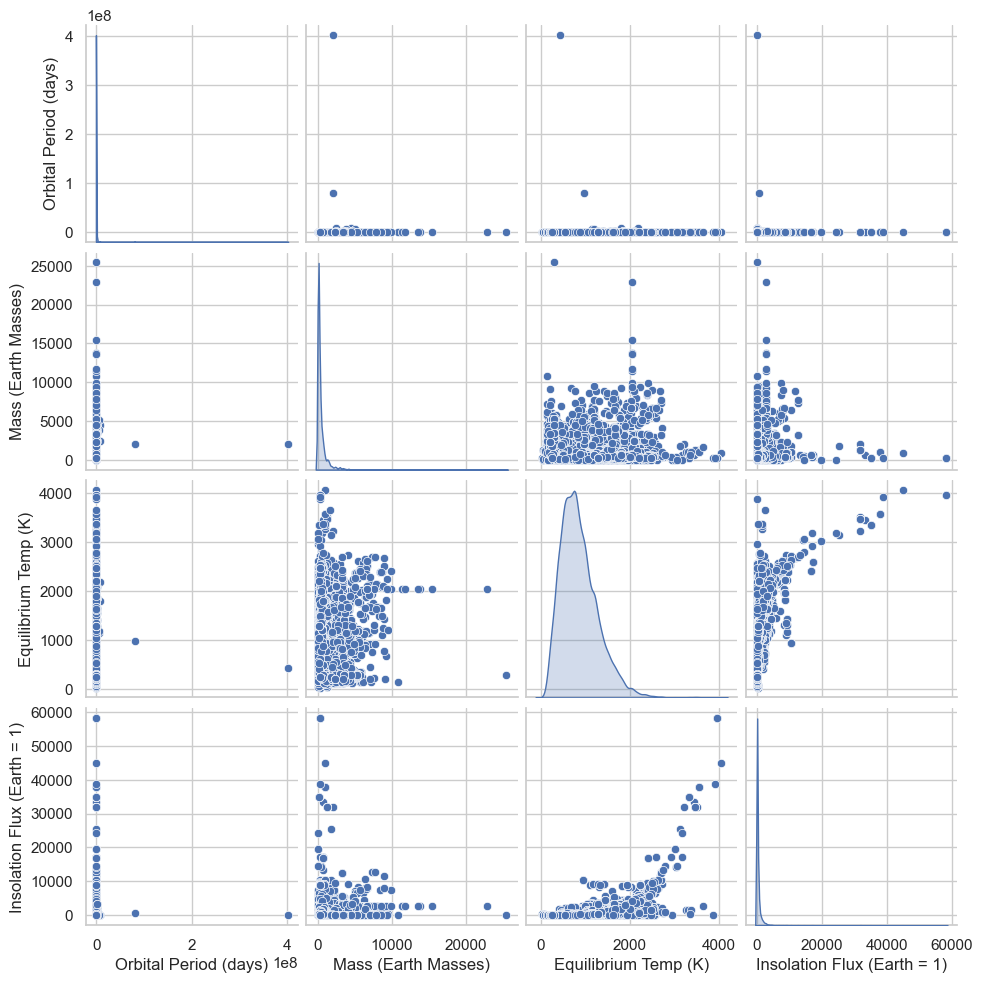

In [161]:
# Rename columns for better visualization

df_renamed = df.rename(columns={
    "orbital_period_days": "Orbital Period (days)",
    "planet_mass_earth_masses": "Mass (Earth Masses)",
    "equilibrium_temperature_kelvin": "Equilibrium Temp (K)",
    "insolation_flux_earth_1": "Insolation Flux (Earth = 1)"
})

# Pairplot with renamed columns
sns.pairplot(df_renamed[["Orbital Period (days)", "Mass (Earth Masses)", 
                         "Equilibrium Temp (K)", "Insolation Flux (Earth = 1)"]], diag_kind='kde')
plt.show()


/var/folders/sl/vq1yb_j914g7ws4rwcd8f4pm0000gn/T/ipykernel_43906/1232624937.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["discovery_method"], order=df["discovery_method"].value_counts().index, palette="coolwarm")


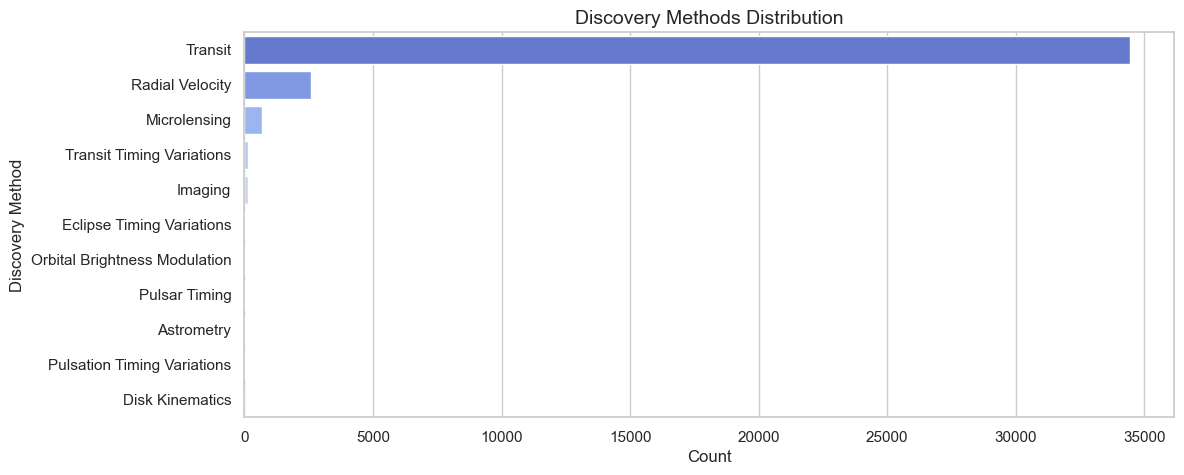

In [162]:
# Set style
sns.set(style="whitegrid")

# Figure 1: Discovery Methods Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=df["discovery_method"], order=df["discovery_method"].value_counts().index, palette="coolwarm")
plt.title("Discovery Methods Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Discovery Method")
plt.show()

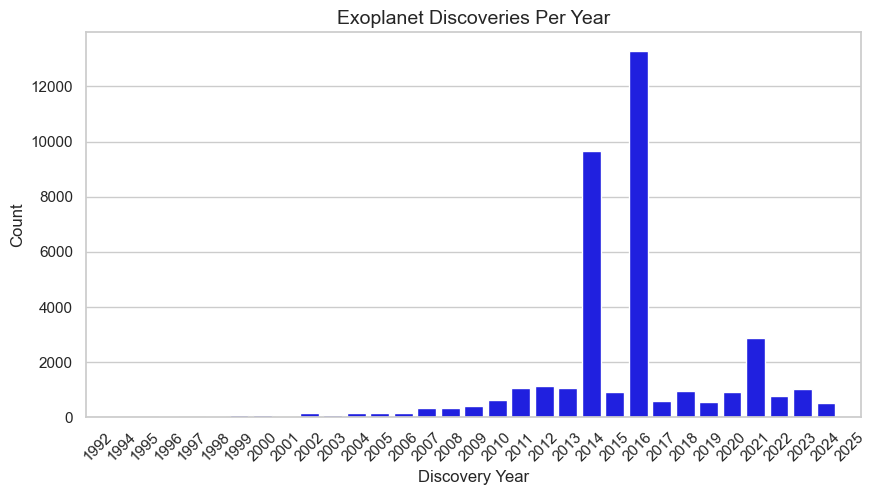

In [163]:
# Figure 4: Number of Exoplanets Discovered Per Year
plt.figure(figsize=(10, 5))
sns.countplot(x=df["discovery_year"], color="blue")
plt.xticks(rotation=45)
plt.title("Exoplanet Discoveries Per Year", fontsize=14)
plt.xlabel("Discovery Year")
plt.ylabel("Count")
plt.show()

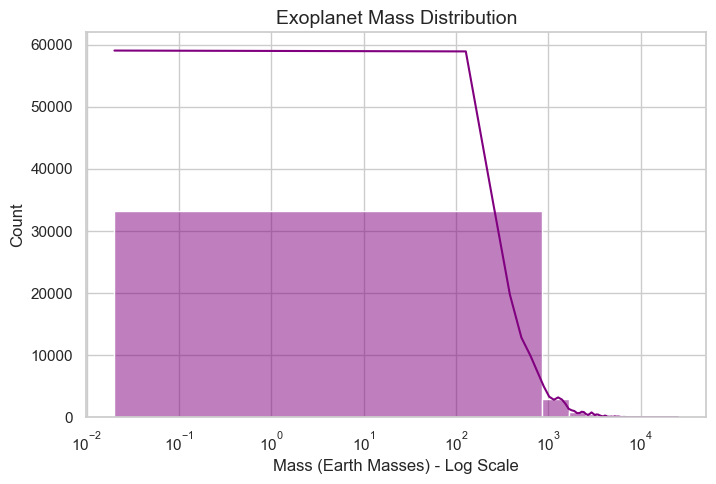

In [70]:
# Figure 2: Exoplanet Mass Distribution (log scale for better visualization)
plt.figure(figsize=(8, 5))
sns.histplot(df["planet_mass_earth_masses"].dropna(), bins=30, kde=True, color="purple")
plt.xscale("log")
plt.title("Exoplanet Mass Distribution", fontsize=14)
plt.xlabel("Mass (Earth Masses) - Log Scale")
plt.ylabel("Count")
plt.show()

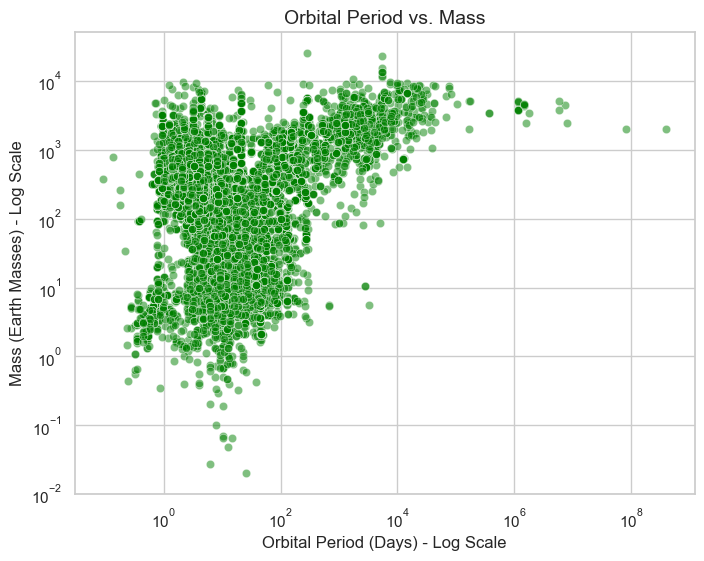

In [174]:
# Figure 3: Orbital Period vs. Mass (log-log scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["orbital_period_days"], y=df["planet_mass_earth_masses"], alpha=0.5, color="green")
plt.xscale("log")
plt.yscale("log")
plt.title("Orbital Period vs. Mass", fontsize=14)
plt.xlabel("Orbital Period (Days) - Log Scale")
plt.ylabel("Mass (Earth Masses) - Log Scale")
plt.show()

In [32]:
#Feature Engineering
    #Select the most relevant features (Feature Selection).
   #Create new meaningful features (Feature Extraction).
   #Reduce dimensionality (PCA, LDA, t-SNE).

In [176]:
# Select relevant features (Modify as needed based on dataset content)
selected_features = ['orbital_period_days', 'planet_mass_earth_masses', 'equilibrium_temperature_kelvin', 'insolation_flux_earth_1']
label_column = 'discovery_method'  # Modify based on dataset

In [178]:
print("mass null : ",df['planet_mass_earth_masses'].isna().sum())
print("orbital_period_days null : ", df['orbital_period_days'].isna().sum())

mass null :  0
orbital_period_days null :  0


In [180]:
# Ensure selected features exist
missing_features = [col for col in selected_features + [label_column] if col not in df.columns]
if missing_features:
    print("Missing columns:", missing_features)
else:
    print("All selected features exist.")

All selected features exist.


In [182]:
#5. Splitting the Dataset
    #Split the data into Training, Validation, and Test sets (e.g., 70-20-10 or 80-20).

In [184]:
# Encoding categorical labels
le = LabelEncoder()
df[label_column] = le.fit_transform(df[label_column])

In [186]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Astrometry': 0, 'Disk Kinematics': 1, 'Eclipse Timing Variations': 2, 'Imaging': 3, 'Microlensing': 4, 'Orbital Brightness Modulation': 5, 'Pulsar Timing': 6, 'Pulsation Timing Variations': 7, 'Radial Velocity': 8, 'Transit': 9, 'Transit Timing Variations': 10}


In [188]:
# Define features (X) and target (y)
X = df[selected_features]
y = df[label_column]

In [190]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [192]:
#6. Choosing a Machine Learning Model
   #Select the appropriate algorithm based on the problem type:
   #Supervised Learning (Regression, Classification)
   #Unsupervised Learning (Clustering, Anomaly Detection)
   #Reinforcement Learning (Decision-making tasks)

In [38]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=1))
#selected_features = ['orbital_period_days', 'planet_mass_earth_masses', 'equilibrium_temperature_kelvin', 'insolation_flux_earth_1']
new_prediction = rf_model.predict([[665.25, 1.0, 288, 1.0]])
print("New Predict :", le.inverse_transform(new_prediction))

NameError: name 'X_train' is not defined

/var/folders/sl/vq1yb_j914g7ws4rwcd8f4pm0000gn/T/ipykernel_43906/2943257310.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf[sorted_indices_rf], y=np.array(feature_names)[sorted_indices_rf], palette="viridis")


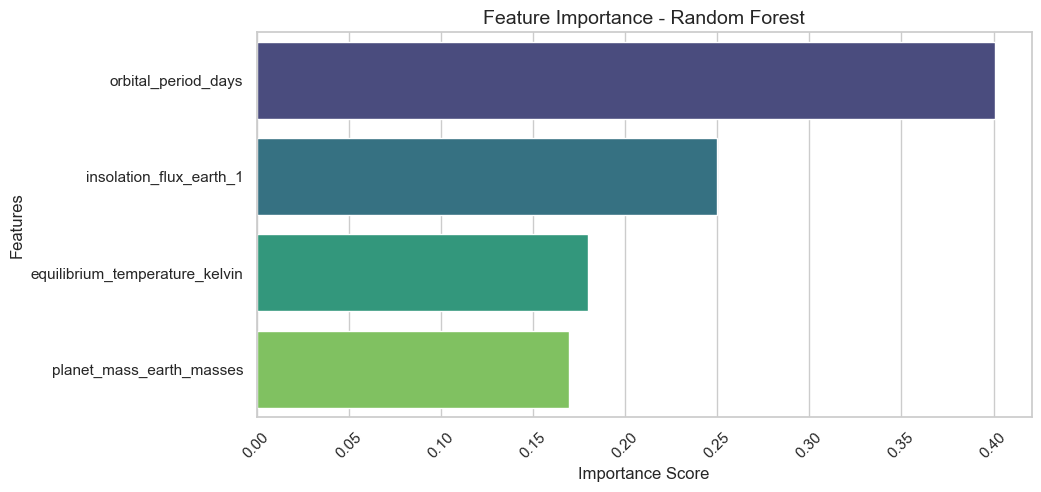

In [195]:
# Feature Importance Analysis for Random Forest
importances_rf = rf_model.feature_importances_

# Ensure feature names match the training columns
feature_names = selected_features  

# Sort feature importance
sorted_indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances_rf[sorted_indices_rf], y=np.array(feature_names)[sorted_indices_rf], palette="viridis")
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [59]:
#8. Model Evaluation
#Measure model performance using metrics like:
#Classification: Accuracy, Precision, Recall, F1-score, AUC-ROC.
#Regression: RMSE, MAE, R² score.
#Perform cross-validation to check for overfitting.


In [64]:
# XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9527435022315568
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.33      0.20      0.25         5
           3       0.36      0.18      0.24        22
           4       0.83      0.62      0.71       124
           5       0.75      0.38      0.50         8
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1
           8       0.84      0.60      0.70       506
           9       0.96      0.99      0.98      6914
          10       0.93      0.38      0.54        34

    accuracy                           0.95      7618
   macro avg       0.55      0.37      0.43      7618
weighted avg       0.95      0.95      0.95      7618



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/var/folders/sl/vq1yb_j914g7ws4rwcd8f4pm0000gn/T/ipykernel_43906/3040509964.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb[sorted_indices_xgb], y=np.array(feature_names)[sorted_indices_xgb], palette="magma")


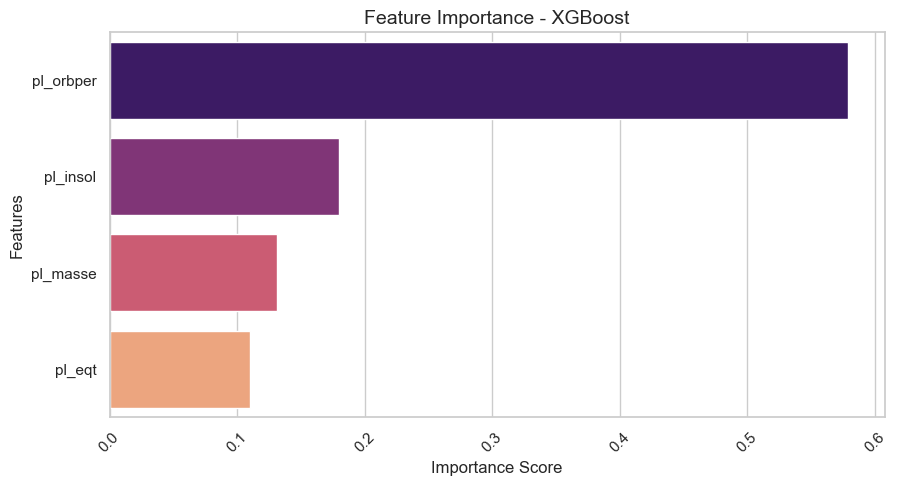

In [88]:
# Feature Importance Analysis for XGBoost
importances_xgb = xgb_model.feature_importances_

sorted_indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances_xgb[sorted_indices_xgb], y=np.array(feature_names)[sorted_indices_xgb], palette="magma")
plt.title("Feature Importance - XGBoost", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [66]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Neural Network Evaluation
y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1905/1905 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8924 - loss: 0.5876 - val_accuracy: 0.9187 - val_loss: 0.3197
Epoch 2/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9162 - loss: 0.3344 - val_accuracy: 0.9178 - val_loss: 0.3110
Epoch 3/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9194 - loss: 0.3251 - val_accuracy: 0.9203 - val_loss: 0.3054
Epoch 4/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9183 - loss: 0.3199 - val_accuracy: 0.9211 - val_loss: 0.3013
Epoch 5/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9224 - loss: 0.3087 - val_accuracy: 0.9223 - val_loss: 0.3011
Epoch 6/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9195 - loss: 0.3150 - val_accuracy: 0.9245 - val_loss: 0.2973
Epoch 7/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9174 - loss: 0.3170 - val_accuracy: 0.9206 - val_loss: 0.2994
Epoch 8/50
1905/1905 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9226 - loss: 0.3002 - val_accurac

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import shap
import seaborn as sns

# Create an explainer for the neural network
explainer = shap.Explainer(nn_model, X_train)  # Assuming X_train contains your input data
shap_values = explainer(X_train)

# Compute mean absolute SHAP values for each feature
feature_importance = np.abs(shap_values.values).mean(axis=0)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance[sorted_indices], y=np.array(feature_names)[sorted_indices], palette="magma")
plt.title("Feature Importance - Neural Network (SHAP)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(rotation=45)
plt.show()

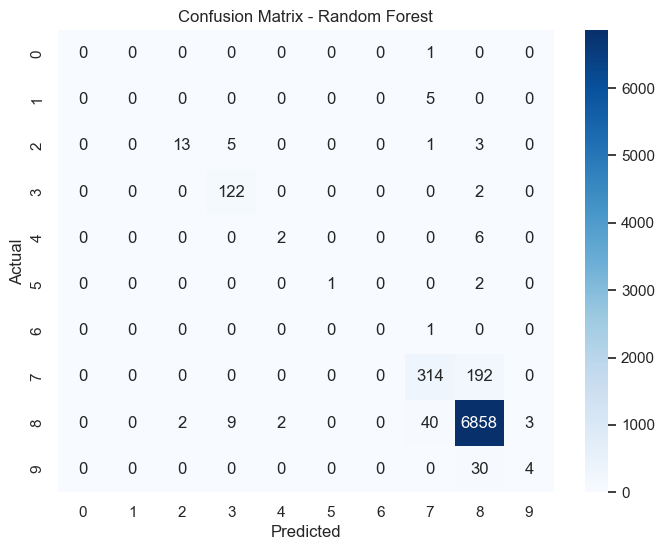

In [46]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
